# RFM ANALYSIS
- Recency
- Frequncy
- Monetary

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the Online+RetailData
# github.com/sumathi16
url ='https://media.githubusercontent.com/media/sumathi16/ML_FDP_SVEC/master/Online%2BRetail.csv'
data = pd.read_csv(url,encoding='ISO-8859-1')
data.shape

(541909, 8)

In [4]:
# Check the features
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# observe the type of the data
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# Calculate the number of customers
data.CustomerID.nunique()

4372

In [7]:
# Misisng values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Remove the missing values
data.dropna(inplace=True)

In [11]:
# Check the number of rows and columns after removing the missing values
data.shape

(406829, 8)

In [12]:
#observe the dates in invoice column
data.InvoiceDate[:5]

0    01-12-2010 08:26
1    01-12-2010 08:26
2    01-12-2010 08:26
3    01-12-2010 08:26
4    01-12-2010 08:26
Name: InvoiceDate, dtype: object

In [13]:
data.InvoiceDate.sample(5)

365767    28-09-2011 16:07
483649    20-11-2011 12:37
308825    22-08-2011 13:40
377469    05-10-2011 08:17
404106    18-10-2011 13:10
Name: InvoiceDate, dtype: object

In [16]:
pd.to_datetime(data.InvoiceDate[:5],format='%d-%m-%Y %H:%M')

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [17]:
# convert the InvoiceDate column into datetime object
print(data.InvoiceDate.dtype)
data.InvoiceDate = pd.to_datetime(data.InvoiceDate,format='%d-%m-%Y %H:%M')
print(data.InvoiceDate.dtype)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [18]:
print(data.InvoiceDate.dtype)

datetime64[ns]


#### Monetary

In [19]:
data ['Total'] = data.Quantity * data.UnitPrice
data.Total[:5]

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total, dtype: float64

In [20]:
data[['UnitPrice','Quantity','Total']][:5]

,UnitPrice,Quantity,Total
0,2.55,6,15.30
1,3.39,6,20.34
2,2.75,8,22.00
3,3.39,6,20.34
4,3.39,6,20.34


##### Grouping using Pandas

In [25]:
Monetary = data.groupby('CustomerID').Total.sum()
type(Monetary)

pandas.core.series.Series

In [29]:
Monetary

CustomerID
12346.0    0.000000e+00
12347.0    4.310000e+03
12348.0    1.797240e+03
12349.0    1.757550e+03
12350.0    3.344000e+02
12352.0    1.545410e+03
12353.0    8.900000e+01
12354.0    1.079400e+03
12355.0    4.594000e+02
12356.0    2.811430e+03
12357.0    6.207670e+03
12358.0    1.168060e+03
12359.0    6.245530e+03
12360.0    2.662060e+03
12361.0    1.899000e+02
12362.0    5.154580e+03
12363.0    5.520000e+02
12364.0    1.313100e+03
12365.0    3.206900e+02
12367.0    1.689000e+02
12370.0    3.545690e+03
12371.0    1.887960e+03
12372.0    1.298040e+03
12373.0    3.646000e+02
12374.0    7.429300e+02
12375.0    4.554200e+02
12377.0    1.628120e+03
12378.0    4.008620e+03
12379.0    8.502900e+02
12380.0    2.720560e+03
               ...     
18245.0    2.507560e+03
18246.0    5.961000e+02
18248.0    7.830200e+02
18249.0    9.534000e+01
18250.0    3.429200e+02
18251.0    4.314720e+03
18252.0    5.266700e+02
18255.0    1.033000e+02
18256.0   -5.010000e+01
18257.0    2.265380e+03
18259

In [33]:
Monetary = Monetary.reset_index()
Monetary.head()

,CustomerID,Total
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


##### Frequency

In [49]:
data.InvoiceNo.nunique()

22190

In [50]:
Frequency = data.groupby('CustomerID').InvoiceNo.count()
type(Frequency)

pandas.core.series.Series

In [51]:
Frequency

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
12352.0     95
12353.0      4
12354.0     58
12355.0     13
12356.0     59
12357.0    131
12358.0     19
12359.0    254
12360.0    129
12361.0     10
12362.0    274
12363.0     23
12364.0     85
12365.0     23
12367.0     11
12370.0    167
12371.0     63
12372.0     52
12373.0     14
12374.0     33
12375.0     18
12377.0     77
12378.0    219
12379.0     41
12380.0    105
          ... 
18245.0    177
18246.0      4
18248.0     49
18249.0      8
18250.0     22
18251.0     16
18252.0     98
18255.0      6
18256.0      4
18257.0    123
18259.0     42
18260.0    140
18261.0     21
18262.0     13
18263.0     62
18265.0     46
18268.0      2
18269.0      8
18270.0     13
18272.0    170
18273.0      3
18274.0     22
18276.0     16
18277.0      9
18278.0      9
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [52]:
Frequency = Frequency.reset_index()
Frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


##### Recency

In [38]:
data.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [39]:
data['LastPurchase'] =  data.InvoiceDate.max() - data.InvoiceDate
data['LastPurchase'][:5]

0   373 days 04:24:00
1   373 days 04:24:00
2   373 days 04:24:00
3   373 days 04:24:00
4   373 days 04:24:00
Name: LastPurchase, dtype: timedelta64[ns]

In [44]:
data['LastPurchase'] = data['LastPurchase'].dt.days + 1
data['LastPurchase'][:5]

0    374
1    374
2    374
3    374
4    374
Name: LastPurchase, dtype: int64

In [48]:
Recency = data.groupby('CustomerID').LastPurchase.min()
Recency =Recency.reset_index()
Recency.head()

,CustomerID,LastPurchase
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


##### Creating Dataframe with columns Recency,Frequency,Monetary, CustomerID

In [53]:
df1 = pd.merge(Monetary,Frequency,on='CustomerID')
df2 = pd.merge(df1,Recency,on='CustomerID')
df2.describe()

,CustomerID,Total,InvoiceNo,LastPurchase
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,93.053294,92.047118
std,1722.390705,8219.345141,232.471608,100.765435
min,12346.000000,-4287.630000,1.000000,1.000000
25%,13812.750000,293.362500,17.000000,17.000000
50%,15300.500000,648.075000,42.000000,50.000000
75%,16778.250000,1611.725000,102.000000,143.000000
max,18287.000000,279489.020000,7983.000000,374.000000


In [55]:
df2.set_index('CustomerID',inplace=True)

In [56]:
df2.head()

,Total,InvoiceNo,LastPurchase
CustomerID,,,
12346.0,0.00,2,326
12347.0,4310.00,182,2
12348.0,1797.24,31,75
12349.0,1757.55,73,19
12350.0,334.40,17,310


In [57]:
df2.describe()

,Total,InvoiceNo,LastPurchase
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,92.047118
std,8219.345141,232.471608,100.765435
min,-4287.630000,1.000000,1.000000
25%,293.362500,17.000000,17.000000
50%,648.075000,42.000000,50.000000
75%,1611.725000,102.000000,143.000000
max,279489.020000,7983.000000,374.000000


In [58]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df2 = pd.DataFrame(sc.fit_transform(df2),\
                   columns=['Monetary','Frequency','Recency'])
df2.describe()

,Monetary,Frequency,Recency
count,4372.000000,4372.000000,4372.000000
mean,0.021799,0.011533,0.244094
std,0.028964,0.029124,0.270149
min,0.000000,0.000000,0.000000
25%,0.016143,0.002005,0.042895
50%,0.017393,0.005137,0.131367
75%,0.020789,0.012653,0.380697
max,1.000000,1.000000,1.000000


##### Apply KMeans

In [60]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
km.predict(df2)

array([0, 1, 1, ..., 1, 1, 1])

In [63]:
km.predict(df2)==1

array([False,  True,  True, ...,  True,  True,  True])

In [64]:
df2[km.predict(df2)==1]

,Monetary,Frequency,Recency
1,0.030297,0.022676,0.002681
2,0.021442,0.003758,0.198391
3,0.021303,0.009020,0.048257
5,0.020555,0.011776,0.093834
9,0.025016,0.007266,0.058981
10,0.036984,0.016287,0.085791
11,0.019225,0.002255,0.002681
12,0.037118,0.031696,0.018767
13,0.024490,0.016036,0.136729
15,0.033273,0.034202,0.005362


In [65]:
df2[km.predict(df2)==0]

,Monetary,Frequency,Recency
0,0.015109,0.000125,0.871314
4,0.016288,0.002005,0.828418
6,0.015423,0.000376,0.544236
7,0.018913,0.007141,0.619303
8,0.016728,0.001503,0.571046
14,0.015778,0.001128,0.766756
18,0.016239,0.002756,0.777480
23,0.016394,0.001629,0.831099
26,0.020847,0.009521,0.841823
31,0.021591,0.012403,0.493298


In [67]:
km.inertia_

72.79140206108409

In [69]:
d ={}
for k in range(2,15):
    kmn = KMeans(n_clusters=k)
    kmn.fit(df2)
    d[k] = kmn.inertia_


In [70]:
d

{2: 72.79140206108409,
 3: 38.18554266730415,
 4: 24.711462774193645,
 5: 17.958176104267373,
 6: 14.578038039923024,
 7: 11.265456497557452,
 8: 9.393094636114286,
 9: 8.01923195696421,
 10: 6.849678263745028,
 11: 5.784565946368511,
 12: 5.060541938602263,
 13: 4.401080275607798,
 14: 3.864569700884364}

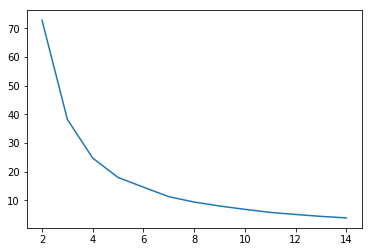

In [71]:
plt.plot(list(d.keys()),list(d.values()))